<a href="https://colab.research.google.com/github/ntolayd/CE888/blob/main/Lab2/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [20]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [45]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
    data_mean = []
    for _ in range(n_bootstraps):
      data_mean.append(np.mean(np.random.choice(x,sample_size)))
    data_mean = sorted(data_mean)
    lower = np.percentile(data_mean,2.5)
    upper = np.percentile(data_mean,97.5)
    data_mean = np.mean(data_mean)
    return data_mean, lower, upper

In [46]:
a = bootstrap_mean(data, data.shape[0], 10)

In [49]:
data.shape[0]

14

In [ ]:
a = bootstrap_mean(data, data.shape[0], 10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

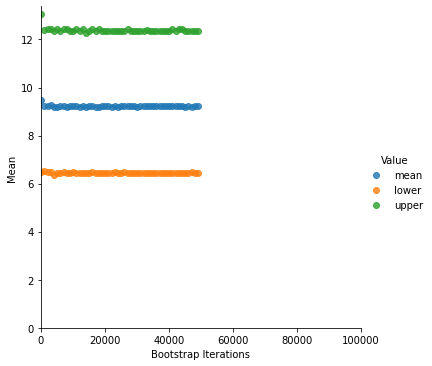

In [48]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [52]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
    data_mean = []
    for _ in range(n_bootstraps):
      data_mean.append(np.mean(np.random.choice(sample,sample_size)))
    data_mean = sorted(data_mean)
    lower = np.percentile(data_mean, (100-ci)/2)
    upper = np.percentile(data_mean,100-(100-ci)/2)
    data_mean = np.mean(data_mean)
    return data_mean, lower, upper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

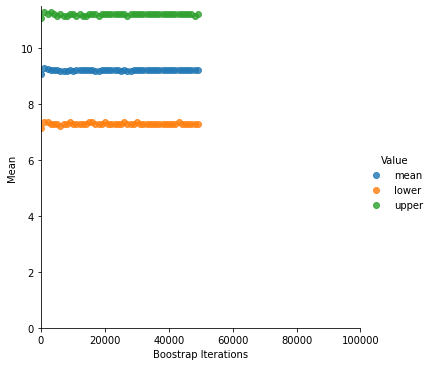

In [53]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [54]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the currentlumns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against t and new fleets are in different cohe other).
df2 = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
# Note: you can add more cells as needed to organise your code and your plots



## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


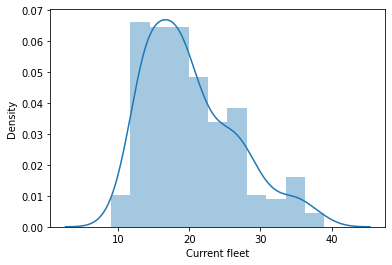

In [57]:
#Histogram of current fleet
sns.distplot(df2['Current fleet'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


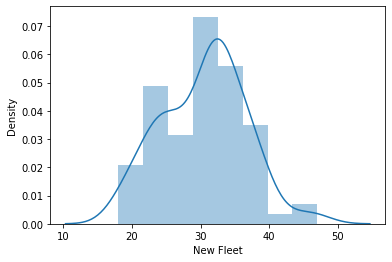

In [60]:
#Histogram of new fleet
sns.distplot(df2['New Fleet'])

In [61]:
#mean of current fleet
df2['Current fleet'].mean()

20.14457831325301

In [62]:
#mean of new fleet
df2['New Fleet'].mean()

30.481012658227847

In [64]:
#95% CI for current fleet
data_mean, lower_bound, upper_bound = bootstrap_mean_ci(df2['Current fleet'],len(df2['Current fleet']), 10000, 95)
print(f'the lower bound of 95% CI for current fleet is {lower_bound} and the upper bound of 95% CI for current fleet is {upper_bound}')

the lower bound of 95% CI for current fleet is 19.34136546184739 and the upper bound of 95% CI for current fleet is 20.919678714859437


In [66]:
#95% CI for new fleet
data_mean, lower_bound, upper_bound = bootstrap_mean_ci(df2['New Fleet'].dropna(),len(df2['New Fleet'].dropna()), 10000, 95)
print(f'the lower bound of 95% CI for new fleet is {lower_bound} and the upper bound of 95% CI for new fleet is {upper_bound}')

the lower bound of 95% CI for new fleet is 29.139240506329113 and the upper bound of 95% CI for new fleet is 31.82278481012658


In [139]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """


    t_obs = np.mean(sample2) - np.mean(sample1)

    concat = np.concatenate([sample1, sample2])

    count = 0

    for _ in range(n_permutations):
      perm = np.random.permutation(concat)
      sample1_new = perm[:len(sample1)]
      sample2_new = perm[len(sample1):]

      t_perm = np.mean(sample2_new) - np.mean(sample1_new)

      if t_perm > t_obs:
        count += 1
      
    pvalue = count / n_permutations
    return pvalue

In [140]:
permut_test(df2['Current fleet'],df2['New Fleet'].dropna(),50000)


0.0

Moodle quiz solutions

In [141]:
#The 85% confidence interval for the mean of the old fleet in the vehicles dataset using 10000 iterations
bootstrap_mean_ci(df2['Current fleet'], len(df2['Current fleet']), 10000, 85)

(20.14581606425703, 19.57429718875502, 20.734939759036145)

In [143]:
#The 92% confidence interval for the mean of the old fleet in the vehicles dataset using 10000 iterations
bootstrap_mean_ci(df2['Current fleet'], len(df2['Current fleet']), 10000, 92)

(20.149024096385546, 19.453815261044177, 20.8714859437751)

In [144]:
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
    data_std = []
    for _ in range(n_bootstraps):
      data_std.append(np.std(np.random.choice(sample,sample_size)))
    data_std = sorted(data_std)
    lower = np.percentile(data_std, (100-ci)/2)
    upper = np.percentile(data_std,100-(100-ci)/2)
    data_std = np.mean(data_std)
    return data_std, lower, upper

In [146]:
#The 90% confidence interval for the standard deviation of the customers dataset using 10000 iterations is (
bootstrap_std_ci(df[' Millons of pounds in sales'],len(df[' Millons of pounds in sales']), 10000, 90)

(5.349472183415518, 3.0614455702481203, 7.107412055203285)

In [147]:
#The 95% confidence interval for the standard deviation of the customers dataset using 10000 iterations is (
bootstrap_std_ci(df[' Millons of pounds in sales'],len(df[' Millons of pounds in sales']), 10000, 95)

(5.327839252866958, 2.699111656228819, 7.350265499789936)

In [148]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [150]:
print(len(dem_share_PA))
print(len(dem_share_OH))


67
88


In [151]:
bootstrap_mean_ci(dem_share_OH, len(dem_share_OH), 100000, 98)

(44.316555125, 41.86340795454546, 46.74318522727272)

In [152]:
bootstrap_mean_ci(dem_share_PA, len(dem_share_PA), 100000, 98)

(45.47465398955224, 42.76716268656717, 48.31956417910447)

In [153]:
permut_test(dem_share_OH, dem_share_PA, 30000)

0.23426666666666668